In [1]:
pip install pyspark

  Stored in directory: C:\Users\Daria\AppData\Local\pip\Cache\wheels\23\35\61\f720c76ff25c680383cd010cd524fa66c91c9b62a4b0aebe9f
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [137]:
# To find out path where pyspark installed
import findspark
findspark.init()

# Create SparkSession and sparkcontext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
spark = SparkSession.builder\
                    .master("local")\
                    .appName('NIS_DavydovaD_HW2')\
                    .getOrCreate()
sc=spark.sparkContext

In [138]:
# Read the input file

rdd_reviews = sc.textFile("1review.txt," + "2review.txt," + "3review.txt," + "4review.txt," + "5review.txt," +
                   "6review.txt," + "7review.txt," + "8review.txt," + "9review.txt," + "10review.txt")

In [139]:
rdd_reviews.count()

96

In [140]:
import re
def ClearAllSymbols(line):
     punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
     lowercased_str = line.lower()
     for ch in punc:
        lowercased_str = lowercased_str.replace(ch, '')
     return lowercased_str

clear_rdd = rdd_reviews.map(ClearAllSymbols)

print(clear_rdd.collect())

['the hosa xlr cables are affordable and very heavily madei have a large mixer and rack and cables everywherei decided to purchase shorter cables and the hosa cables 5ft measurement worked perfectlyyou really will not be disappointed with these', 'i bought these to go from my board to the amp we use them for a mobile church so they take a beating they are still going strong', 'sturdy cord and plugs inexpensive good value i dont require professionallevel equipment so this cord serves my purposes well satisfied with purchase', 'use it every week at gigs  solid no problems with the solder joints  a good quality cable at a very good price', 'hosa products are a good bang for the buck i havent looked up the specifications but im guessing the wire is 22 to 24 awg but since its only 10 long its good enough', 'this was exactly what i was after i have a voice touch and needed a small cord to connect the mic to the voice touch and this was perfect before i used a 20 foot cord to go about 12 inch

In [141]:
#top 10 with unnecessary words
clear_rdd=clear_rdd.flatMap(lambda satir: satir.split(" "))
clear_rdd = clear_rdd.filter(lambda x:x!='')
clear_rdd_count=clear_rdd.map(lambda  word:(word,1))
clear_rdd_count_RBK=clear_rdd_count.reduceByKey(lambda x,y:(x+y)).sortByKey()
clear_rdd_count_RBK=clear_rdd_count_RBK.map(lambda x:(x[1],x[0]))
clear_rdd_count_RBK.sortByKey(False).take(10)

[(286, 'the'),
 (186, 'a'),
 (181, 'to'),
 (175, 'i'),
 (172, 'and'),
 (108, 'it'),
 (102, 'is'),
 (92, 'for'),
 (84, 'of'),
 (72, 'this')]

In [142]:
#clear from unnecessary words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
#top 10
stopwords =stopwords.words('english')
clear_rdd_count_RBK = clear_rdd_count_RBK.filter(lambda x: x[1] not in stopwords).sortByKey(False)
clear_rdd_count_RBK.sortByKey(False).take(10)

[(53, 'cable'),
 (43, 'cables'),
 (37, 'good'),
 (33, 'great'),
 (31, 'one'),
 (27, 'sound'),
 (26, 'mic'),
 (26, 'sm58'),
 (25, 'use'),
 (22, 'like')]

In [144]:
#additional statistics
unique_words = clear_rdd_count_RBK.count()
print("The total number of unique words is {}".\
      format(unique_words))

total_words = clear_rdd_count_RBK.map(lambda a: a[0]).reduce(lambda a, b : a + b)
print("Total number of words: {}".format(total_words))

Average_word_count = total_words/unique_words
print('Average word frequency is {}'.\
      format(round(Average_word_count,1)))

The total number of unique words is 1378
Total number of words: 3301
Average word frequency is 2.4


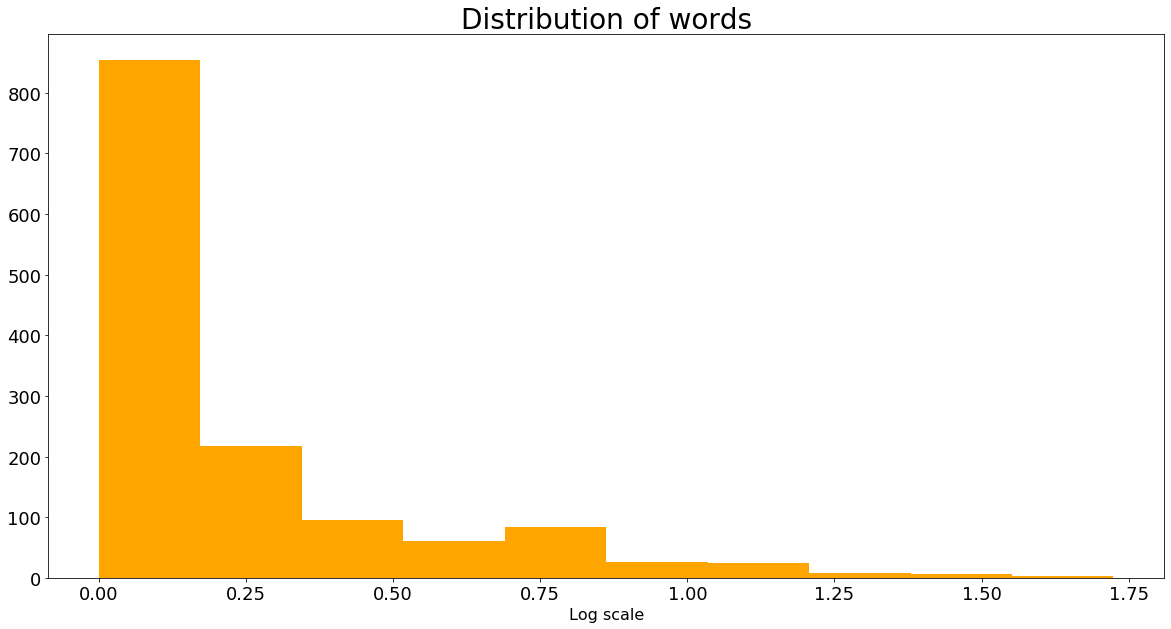

In [145]:
#visualization
import numpy as np

RDDwordCount_numeric_values = clear_rdd_count_RBK.map(lambda x : x[0]).collect()
RDDwordCount_numeric_values[:10]
RDDwordCount_numeric_values_np = np.array(RDDwordCount_numeric_values)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.hist(np.log10(RDDwordCount_numeric_values_np), color = "orange")
plt.title("Distribution of words", fontsize = 28)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

#From the below histogram, we see that most words have frequencies less than 10.

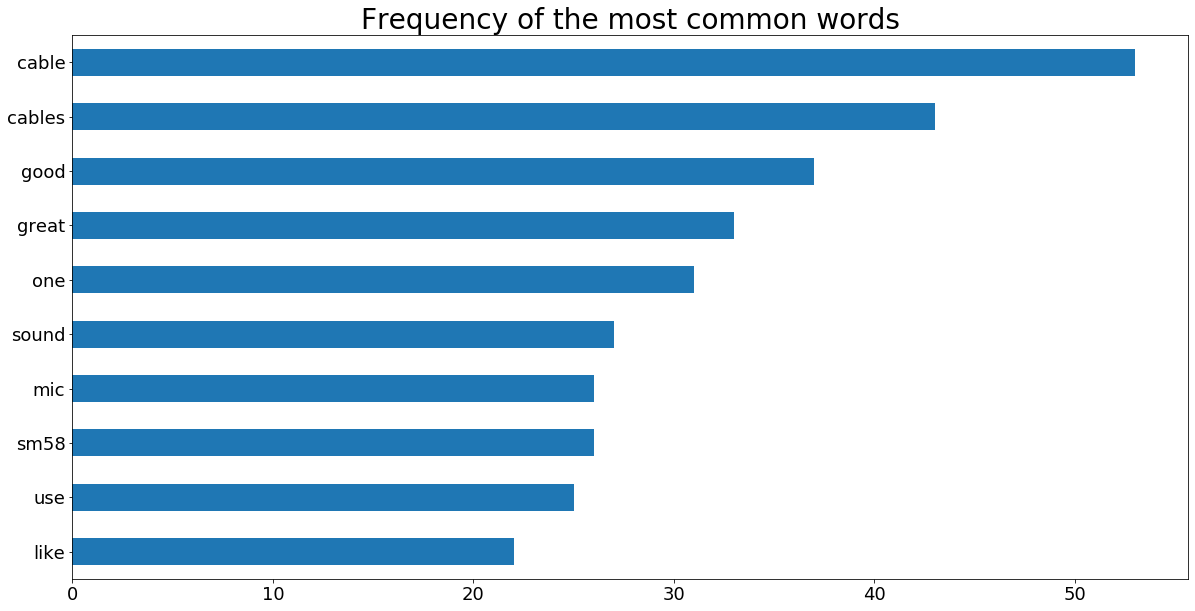

In [146]:
import pandas as pd
top10_words = clear_rdd_count_RBK.takeOrdered(10, lambda x : -x[0])

words = [x[1] for x in top10_words]
count = [x[0] for x in top10_words]
newdict = {"word": words, "frequency": count}

df = pd.DataFrame(newdict)

my_plot = df.plot(figsize = (20, 10), 
              x = "word", y = "frequency", kind  = "barh", legend = False )

my_plot.invert_yaxis()

plt.title("Frequency of the most common words", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")
plt.show()


In [147]:
# Stopping Spark-Session and Spark context
sc.stop()
spark.stop()